# LeNet-5 in Keras

Bulding a Deep Convolutional Neural Network to classify MNIST digits.

#### Set seed for reproducibility

In [1]:
import numpy as np
np.random.seed(42)

#### Load dependencies

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, MaxPooling2D, Conv2D

Using TensorFlow backend.


#### Load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Preprocess data
Flatten and normalise input data.

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [5]:
X_train /= 255
X_test /= 255

In [6]:
# One-hot encoded categories
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

#### Design Neural Network architecture

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation = 'softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

#### Configure model

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### Train!

In [10]:
model.fit(X_train, y_train, batch_size = 128, epochs = 1, verbose = 1, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 133s - loss: 0.2395 - acc: 0.9271 - val_loss: 0.0525 - val_acc: 0.9828


#### Test Prediction

1/1 [==============================] - 0s
The algorithm predicts: y = 0


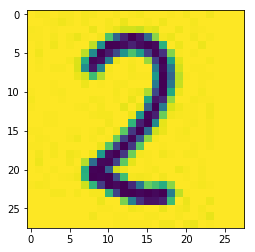

In [14]:
import scipy
from PIL import Image
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline

test_image = "mnist_image_2.jpg"

# Preprocess image to fit the algorithm.
fname = "images/" + test_image
image = np.array(ndimage.imread(fname, flatten = False))

test_image = scipy.misc.imresize(image, size = (28, 28)).reshape((1, 28, 28, 1))
image_prediction = model.predict_classes(test_image)

plt.imshow(image)
print("The algorithm predicts: y = " + str(np.squeeze(image_prediction)))